In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Step 1: Reading and Understanding the Data

In [83]:
df = pd.read_csv("day.csv",header=0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [84]:
df.shape

(730, 16)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- There are no null values

In [86]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Columns can be categorized as:
- Binary - yr, holiday, workingday
- Categorial - Season, mnth, weathersit, weekday
- Continuous - atemp, temp, hum, windspeed, cnt

We can drop columns -
- "Instant" as its only giving serial number
- "dteday" since we already have "yr" and "mnth" columns separately
- "casual" and "registered," since the target is to predict the total count and not by these sub-categories so they can be removed

In [87]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [88]:
df1 = df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

In [89]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Convert categorical columns datatypes to object 

Categorial columns - Season, mnth, weathersit, weekday


In [91]:
df1["season"] = df1["season"].astype("category")

In [92]:
df1["mnth"] = df1["mnth"].astype("object")

In [93]:
df1["weathersit"] = df1["weathersit"].astype("object")

In [94]:
df1["weekday"] = df1["weekday"].astype("object")

In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    object  
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    object  
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(1), float64(4), int64(4), object(3)
memory usage: 63.8+ KB


## Step 2: Visualising the Data

Check for multicollinearity.
Also identify if some predictors directly have a strong association with the outcome variable

In [96]:
cat = df1[["season", "mnth", "weathersit", "weekday"]]
con = df1[["cnt", "atemp", "temp", "hum", "windspeed","yr", "holiday", "workingday"]]

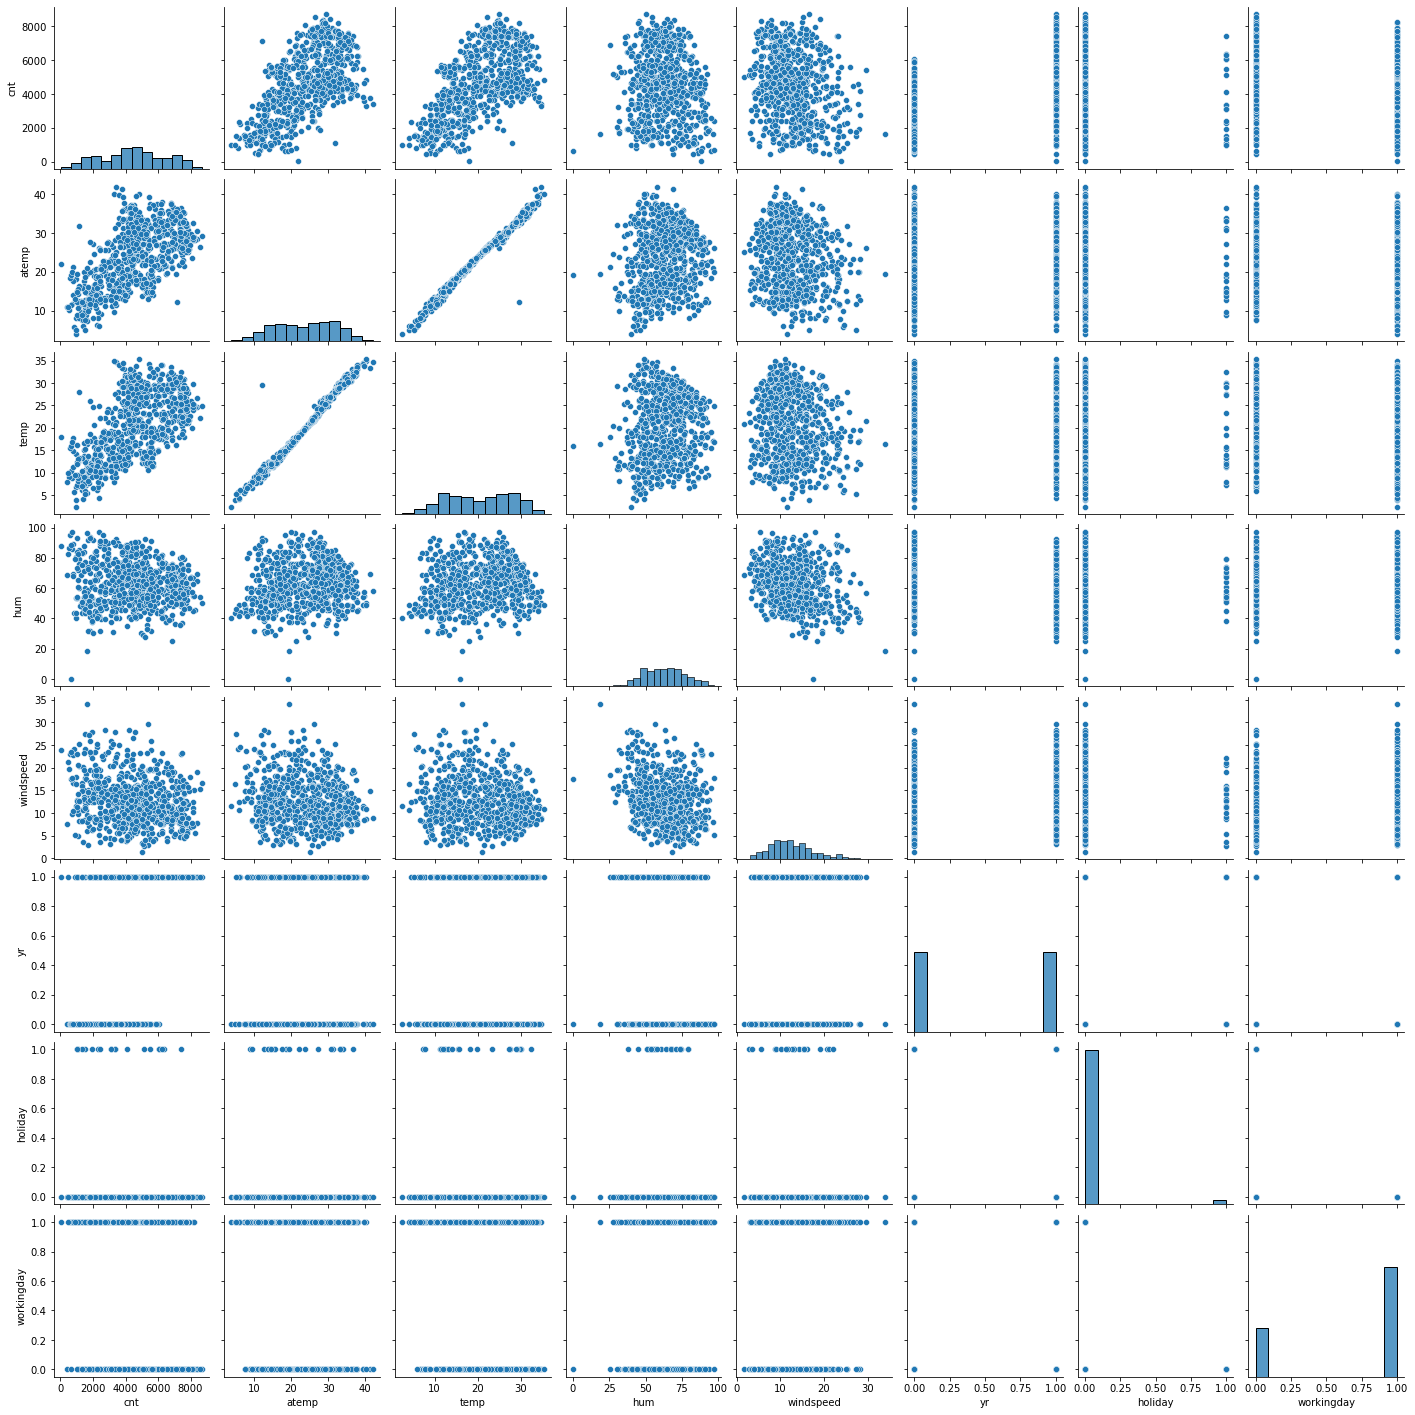

In [97]:
sns.pairplot(con)
plt.show()

Columns "atemp" & "temp" show multicolinearity so we can get rid of one.
There is a linear relationship between "cnt", "atemp"/"temp".

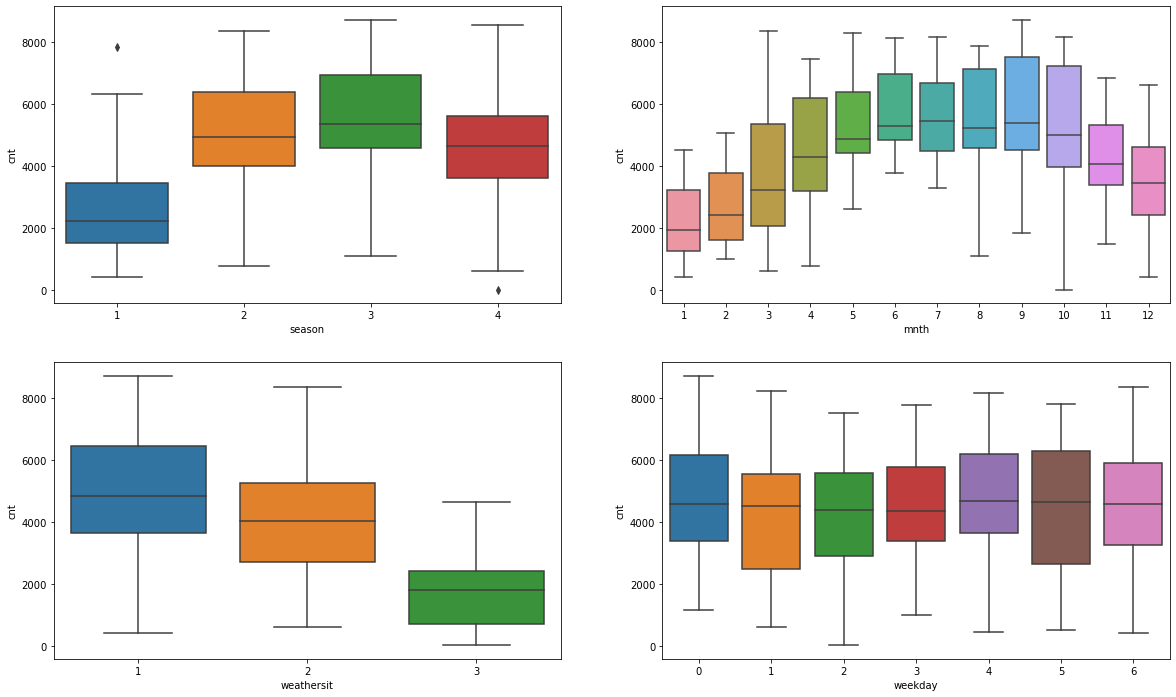

In [98]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df1)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df1)
plt.subplot(2,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df1)
plt.subplot(2,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df1)

plt.show()

*Inference:*

- "season" & "cnt" shows that the most number of bookings for bikes have been made in season2 (summer) and season3 (fall) and least in season1 (spring)
- "mnth' & "cnt" shows that major number of bookings have been made in the months of May, June, July, August, September, October and least in the months of Jan & Feb.
- "weathersit" & "cnt" shows that most bookings were made on Clear, Few clouds, Partly cloudy or Partly cloudy days
- "weekday" & "cnt" shows a very close trend between all days. So it can have some or no influence on the count of bookings

## Step 3: Data Preparation

Dummy Variables need not be created here and all categorical values are in intergers 0 & 1 or higher

In [99]:
df1 = pd.get_dummies(df1, drop_first=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [100]:
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [101]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df1_train, df1_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state=100)

In [102]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null   

#### Rescaling the features using Min-Max scaling

In [103]:
from sklearn.preprocessing import MinMaxScaler

In [104]:
scaler = MinMaxScaler()

In [105]:
df1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [106]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ["temp", "atemp", "hum", "windspeed","cnt"]

df1_train[num_vars] = scaler.fit_transform(df1_train[num_vars])

In [107]:
df1_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0


In [108]:
df1_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


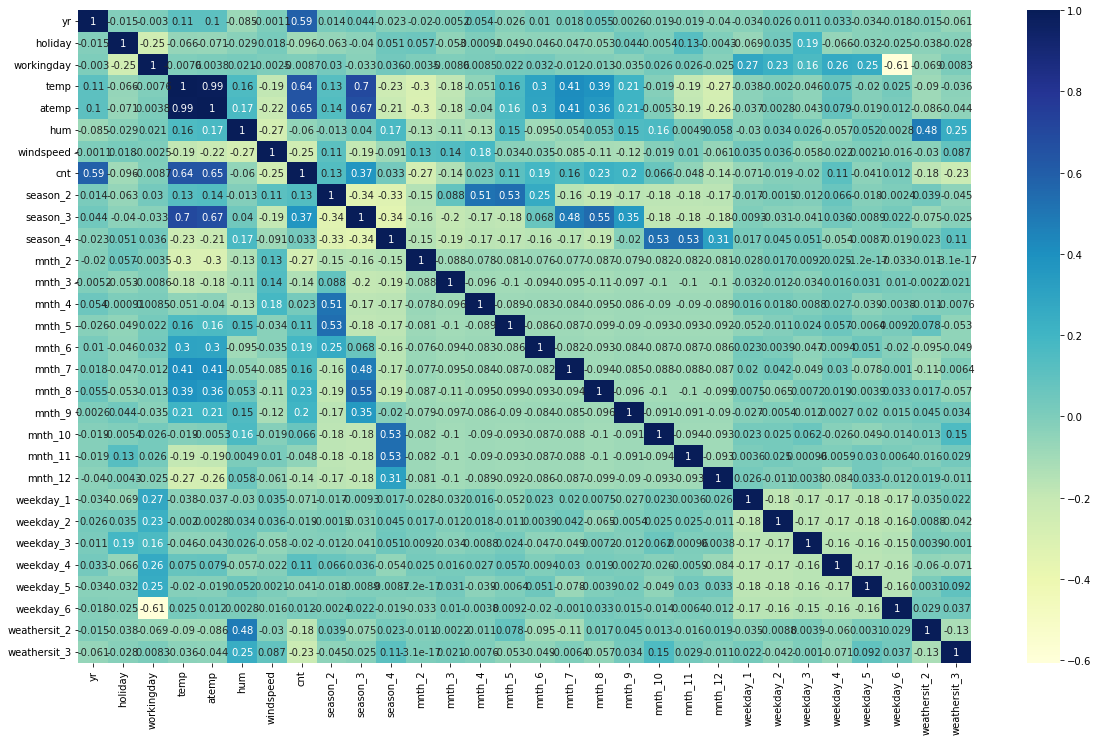

In [109]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 12))
sns.heatmap(df1_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

*Inference:*
    
The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

- `temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

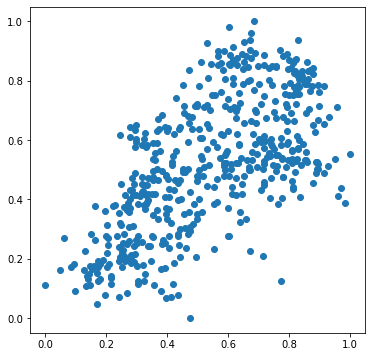

In [110]:
plt.figure(figsize=[6,6])
plt.scatter(df1_train.temp, df1_train.cnt)
plt.show()

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

#### Dividing into X and Y sets for the model building

In [111]:
y_train = df1_train.pop("cnt")
X_train = df1_train

### RFE

Recursive feature elimination

In [112]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [113]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)   
rfe = rfe.fit(X_train, y_train)

In [114]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [115]:
newcols = X_train.columns[rfe.support_]
newcols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [116]:
#Columns that we will be dropping after RFE 
delcols =  X_train.columns[~rfe.support_]
delcols

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

#### Building model using "statsmodel", for the detailed statistics

In [117]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[newcols]

#### Adding all the variables to the model

In [118]:
import statsmodels.api as sm

# Adding a constant variable
X_train_lrm = sm.add_constant(X_train_rfe)

lrm1 = sm.OLS(y_train, X_train_lrm).fit()

lrm1.params

const           0.237574
yr              0.230385
holiday        -0.089060
temp            0.484667
hum            -0.178353
windspeed      -0.183595
season_2        0.115215
season_3        0.043588
season_4        0.153434
mnth_3          0.033322
mnth_5          0.030660
mnth_8          0.051139
mnth_9          0.120896
mnth_10         0.043662
weathersit_2   -0.055804
weathersit_3   -0.244542
dtype: float64

In [119]:
print(lrm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.95e-189
Time:                        20:00:55   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2376      0.027      8.689   

*Inference*

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).
We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

#### Checking VIF
### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [120]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
vif = pd.DataFrame()

vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.64
3,hum,15.55
6,season_3,8.80
4,windspeed,3.80
5,season_2,3.73
7,season_4,3.13
13,weathersit_2,2.15
0,yr,2.04
10,mnth_8,1.85
9,mnth_5,1.68


*Inference*

season_3 has a high p-value as well as high VIF value hence will be dropping it

In [122]:
X_train_new = X_train_rfe.drop(["season_3"], axis = 1)

#### Rebuilding the model without season_3

In [123]:
import statsmodels.api as sm  
X_train_lrm = sm.add_constant(X_train_new)

lrm2 = sm.OLS(y_train, X_train_lrm).fit()

lrm2.params

const           0.236921
yr              0.228992
holiday        -0.091254
temp            0.534218
hum            -0.186916
windspeed      -0.188142
season_2        0.097055
season_4        0.140117
mnth_3          0.026956
mnth_5          0.024691
mnth_8          0.062772
mnth_9          0.131390
mnth_10         0.038961
weathersit_2   -0.054466
weathersit_3   -0.239302
dtype: float64

In [124]:
lrm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.25e-189
Time:                        20:00:56   Log-Likelihood:                 513.00
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     495   BIC:                            -932.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2369      0.027      8.643      0.000       0.183       0.291
yr               0.2290      0.008     28.377      0.000       0.213       0.245
holiday         -0.0913      0.025     -3.580      0.000      -0.141      -0.041
temp             0.5342      0.023     23.719      0.000       0.490       0.578
hum             -0.1869      0.038     -4.956      0.000      -0.261      -0.113
windspeed       -0.1881      0.026     -7.354      0.000      -0.238      -0.138
season_2         0.0971      0.012      7.950      0.000       0.073       0.121
season_4         0.1401      0.012     11.384      0.000       0.116       0.164
mnth_3           0.0270      0.014      1.880      0.061      -0.001       0.055
mnth_5           0.0247      0.018      1.401      0.162      -0.010       0.059
mnth_8           0.0628      0.016      3.832      0.000       0.031       0.095
mnth_9           0.1314      0.016      8.021      0.000       0.099       0.164
mnth_10          0.0390      0.017      2.251      0.025       0.005       0.073
weathersit_2    -0.0545      0.010     -5.210      0.000      -0.075      -0.034
weathersit_3    -0.2393      0.026     -9.092      0.000      -0.291      -0.188
==============================================================================
Omnibus:                       65.908   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.845
Skew:                          -0.690   Prob(JB):                     1.06e-33
Kurtosis:                       5.289   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
vif = pd.DataFrame()

vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.88
2,temp,10.03
4,windspeed,3.75
6,season_4,2.35
5,season_2,2.31
12,weathersit_2,2.14
0,yr,2.02
8,mnth_5,1.63
9,mnth_8,1.62
11,mnth_10,1.61


##### *Inference*

mnth_5 has a high p-value we will be dropping it

In [126]:
X_train_new = X_train_new.drop(["mnth_5"], axis = 1)

#### Rebuilding the model without mnth_5

In [127]:
X_train_lrm = sm.add_constant(X_train_new)

lrm3 = sm.OLS(y_train, X_train_lrm).fit()

lrm3.params

const           0.232420
yr              0.228609
holiday        -0.091995
temp            0.536385
hum            -0.178989
windspeed      -0.189298
season_2        0.104860
season_4        0.139327
mnth_3          0.023825
mnth_8          0.060819
mnth_9          0.129567
mnth_10         0.038297
weathersit_2   -0.054751
weathersit_3   -0.241787
dtype: float64

In [128]:
lrm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.26e-190
Time:                        20:00:56   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2324      0.027      8.529      0.000       0.179       0.286
yr               0.2286      0.008     28.318      0.000       0.213       0.244
holiday         -0.0920      0.026     -3.606      0.000      -0.142      -0.042
temp             0.5364      0.022     23.849      0.000       0.492       0.581
hum             -0.1790      0.037     -4.795      0.000      -0.252      -0.106
windspeed       -0.1893      0.026     -7.396      0.000      -0.240      -0.139
season_2         0.1049      0.011      9.643      0.000       0.083       0.126
season_4         0.1393      0.012     11.321      0.000       0.115       0.164
mnth_3           0.0238      0.014      1.681      0.093      -0.004       0.052
mnth_8           0.0608      0.016      3.723      0.000       0.029       0.093
mnth_9           0.1296      0.016      7.927      0.000       0.097       0.162
mnth_10          0.0383      0.017      2.212      0.027       0.004       0.072
weathersit_2    -0.0548      0.010     -5.233      0.000      -0.075      -0.034
weathersit_3    -0.2418      0.026     -9.199      0.000      -0.293      -0.190
==============================================================================
Omnibus:                       64.908   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.567
Skew:                          -0.694   Prob(JB):                     6.68e-32
Kurtosis:                       5.198   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
vif = pd.DataFrame()

vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.75
2,temp,10.01
4,windspeed,3.69
6,season_4,2.34
11,weathersit_2,2.14
0,yr,2.02
5,season_2,1.83
8,mnth_8,1.61
10,mnth_10,1.61
9,mnth_9,1.34


##### *Inference*

mnth_3 has a high p-value we will be dropping it

In [130]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

#### Rebuilding the model without mnth_3

In [131]:
X_train_lrm = sm.add_constant(X_train_new)

lrm4 = sm.OLS(y_train, X_train_new).fit()

lrm4.params

yr              0.242115
holiday        -0.086517
temp            0.581975
hum             0.082412
windspeed      -0.054934
season_2        0.102275
season_4        0.145919
mnth_8          0.047721
mnth_9          0.113510
mnth_10         0.019832
weathersit_2   -0.083983
weathersit_3   -0.306039
dtype: float64

In [132]:
lrm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1383.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):                        0.00
Time:                        20:00:56   Log-Likelihood:                          473.24
No. Observations:                 510   AIC:                                     -922.5
Df Residuals:                     498   BIC:                                     -871.7
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
yr               0.2421      0.009     28.351      0.000       0.225       0.259
holiday         -0.0865      0.027     -3.157      0.002      -0.140      -0.033
temp             0.5820      0.023     25.166      0.000       0.537       0.627
hum              0.0824      0.024      3.376      0.001       0.034       0.130
windspeed       -0.0549      0.022     -2.456      0.014      -0.099      -0.011
season_2         0.1023      0.012      8.738      0.000       0.079       0.125
season_4         0.1459      0.013     11.286      0.000       0.121       0.171
mnth_8           0.0477      0.017      2.728      0.007       0.013       0.082
mnth_9           0.1135      0.017      6.493      0.000       0.079       0.148
mnth_10          0.0198      0.019      1.072      0.284      -0.017       0.056
weathersit_2    -0.0840      0.011     -7.859      0.000      -0.105      -0.063
weathersit_3    -0.3060      0.027    -11.282      0.000      -0.359      -0.253
==============================================================================
Omnibus:                       77.287   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.387
Skew:                          -0.810   Prob(JB):                     2.24e-38
Kurtosis:                       5.353   Cond. No.                         9.71
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
vif = pd.DataFrame()

vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.41
2,temp,9.88
4,windspeed,3.59
6,season_4,2.27
10,weathersit_2,2.13
0,yr,2.02
5,season_2,1.83
9,mnth_10,1.61
7,mnth_8,1.60
8,mnth_9,1.34


##### *Inference*

mnth_10 has a high p-value we will be dropping it

In [134]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

#### Rebuilding the model without mnth_10

In [135]:
X_train_lrm = sm.add_constant(X_train_new)

lrm5 = sm.OLS(y_train, X_train_lrm).fit()

lrm5.params

const           0.231667
yr              0.228567
holiday        -0.095802
temp            0.539510
hum            -0.175922
windspeed      -0.183465
season_2        0.102964
season_4        0.148245
mnth_8          0.055338
mnth_9          0.122223
weathersit_2   -0.054365
weathersit_3   -0.235122
dtype: float64

In [136]:
lrm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.1
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          4.43e-191
Time:                        20:00:56   Log-Likelihood:                 508.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     498   BIC:                            -941.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2317      0.027      8.607      0.000       0.179       0.285
yr               0.2286      0.008     28.154      0.000       0.213       0.245
holiday         -0.0958      0.026     -3.741      0.000      -0.146      -0.045
temp             0.5395      0.022     24.503      0.000       0.496       0.583
hum             -0.1759      0.037     -4.694      0.000      -0.250      -0.102
windspeed       -0.1835      0.026     -7.151      0.000      -0.234      -0.133
season_2         0.1030      0.011      9.441      0.000       0.082       0.124
season_4         0.1482      0.011     13.942      0.000       0.127       0.169
mnth_8           0.0553      0.016      3.393      0.001       0.023       0.087
mnth_9           0.1222      0.016      7.542      0.000       0.090       0.154
weathersit_2    -0.0544      0.011     -5.167      0.000      -0.075      -0.034
weathersit_3    -0.2351      0.026     -8.932      0.000      -0.287      -0.183
==============================================================================
Omnibus:                       56.424   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.275
Skew:                          -0.608   Prob(JB):                     6.26e-28
Kurtosis:                       5.101   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Inference*

The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

In [137]:
#to check if the error terms are also normally distributed

y_train_pred = lrm5.predict(X_train_lrm)

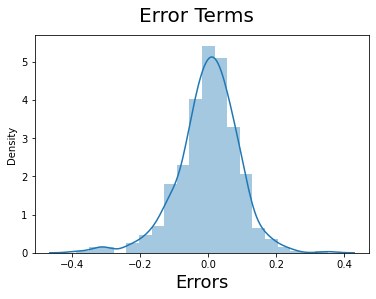

In [138]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 
plt.show()

## Step 8: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [139]:
num_vars = ["temp", "atemp", "hum", "windspeed","cnt"]

df1_test[num_vars] = scaler.transform(df1_test[num_vars])

In [140]:
df1_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [141]:
y_test = df1_test.pop('cnt')
X_test = df1_test
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,1,0.257562,0.243430,0.708888,0.287411,0,0,0,...,0,0,0,1,0,0,0,0,1,0
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0,0,1,...,0,1,0,0,1,0,0,0,0,0
127,0,0,1,0.584649,0.577380,0.650923,0.069510,1,0,0,...,0,0,0,1,0,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [142]:
#Selecting the variables that were part of final model

X_test_new = X_test[X_train_new.columns]

In [143]:
# Adding constant variable to test dataframe

X_test_lrm5 = sm.add_constant(X_test_new)

In [144]:
# Making predictions using the fourth model

y_pred_lrm5 = lrm5.predict(X_test_lrm5)

## Step 9: Model Evaluation

Plotting the graph for actual versus predicted values.

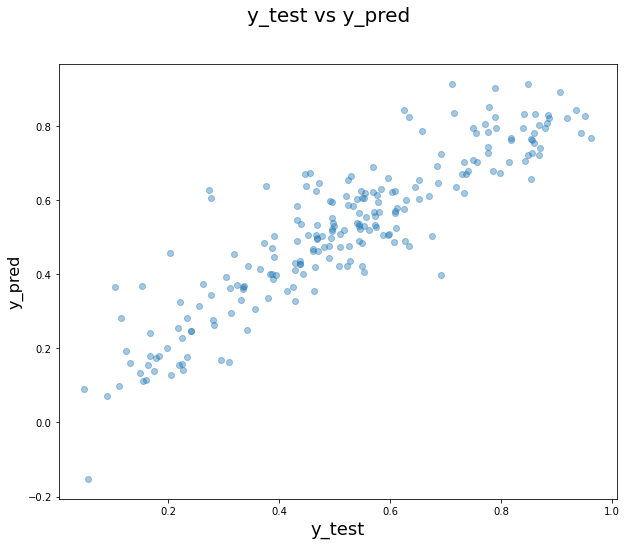

In [150]:
fig = plt.figure(figsize=[10,8])
plt.scatter(y_test, y_pred_lrm5, alpha=.4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [156]:
# R squared value for test
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_lrm5)
r2

0.8045626124663317

In [153]:
X_test_new.shape

(219, 11)

In [157]:
# Adjusted R squared value for test

n = X_test_new.shape[0]
p = X_test_new.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7941770508099532

***Inference***

R-squared value for train model is - 0.841

Adjusted R-squared value for train model is - 0.838

R-squared value for test model is - 0.804

Adjusted R-squared value for test model is - 0.794\

The model that can very well generalize various datasets.

We can see that the **equation of our best fitted line** is:

cnt = 0.231667+ (yr x 0.228567) - (holiday x 0.095802) + (temp x 0.539510) - (hum x 0.175922) - (windspeed x 0.183465) + (season_2 x 0.102964) + (season_4 x 0.148245) + (mnth_8 x 0.055338) + (mnth_9 x 0.122223) - (weathersit_2 x 0.054365) - (weathersit_3 x 0.235122)

The **top 3 predictor variables** that influences the bike booking are:

- **temp** - having a coefficient value of 0.5395 indicates that a unit increase in temperature variable increases the bike hire numbers by 0.5395 units.
- **weathersit_3** - having a coefficient value of 	-0.2351 indicates that a unit increase in weather situation 3 variable decreases the bike hire numbers by 0.2351 units.
- **yr** - having a coefficient value of 0.2286 indicates that a unit increase in temperature variable increases the bike hire numbers by 0.2286 units.